In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
import scipy.stats as st
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr        

from IPython.display import display
from scipy.stats import gaussian_kde
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from itertools import combinations
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator

In [3]:
from plotnine import ggplot, geom_boxplot, aes, stat_smooth, facet_wrap, theme_matplotlib, ylim
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['svg.fonttype'] = 'none'
rcParams['axes.grid'] = True
rcParams['axes.grid.axis'] = 'both'
rcParams['axes.grid.which'] = 'both'
rcParams['grid.color'] = "black"
rcParams['grid.linestyle'] = 'dashed'
rcParams['lines.linewidth'] = 1
rcParams['axes.linewidth'] = 0.5
rcParams['grid.linewidth'] = 0.25
rcParams['grid.alpha'] = 0.5
rcParams['figure.subplot.wspace'] = 0.4
rcParams['figure.subplot.hspace'] = 0.5
rcParams['axes.labelpad'] = 0.5

rcParams['axes.labelsize'] = 11
rcParams['axes.labelweight'] = "normal"
rcParams['axes.titlesize'] = 12
rcParams['axes.titleweight'] = "bold"
rcParams['figure.titlesize'] = 14
rcParams['figure.titleweight'] = "bold"
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['legend.fontsize'] = 11
rcParams['legend.title_fontsize'] = 12
rcParams['legend.title_fontsize'] = 12

# Figure 7B

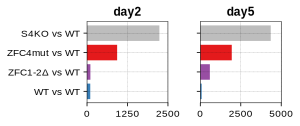

In [4]:
new_bar_list = {"ko vs wt timepoint2": 2235,
"ko vs wt timepoint5": 4353,
"wt vs wt timepoint2": 100,
"wt vs wt timepoint5": 83,
"zfc12d vs wt timepoint2": 104,
"zfc12d vs wt timepoint5": 590,
"zfc4mut vs wt timepoint2": 930,
"zfc4mut vs wt timepoint5": 1943}

fig, (ax, bx) = plt.subplots(1, 2, figsize=(3.5,1.5), sharey=True)
for i, j, c in zip(range(4,0,-1), ["ko vs wt", "zfc4mut vs wt", "zfc12d vs wt", "wt vs wt"], ["#bdbdbd", "#e41a1c", "#984ea3", "#377eb8"]):
    ax.barh(i, new_bar_list["{} timepoint2".format(j)], 0.8, label="day2", color=c, linewidth=0.5)
    bx.barh(i, new_bar_list["{} timepoint5".format(j)], 0.8, label="day5", color=c, linewidth=0.5)
ax.set_yticks([1,2,3,4])
ax.set_yticklabels(["WT vs WT", "ZFC1-2Δ vs WT", "ZFC4mut vs WT", "S4KO vs WT"])
_ = ax.set_xlim(0, 2500)
_ = ax.set_xticks([0, 1250, 2500])
_ = bx.set_xlim(0, 5000)
_ = ax.set_title("day2")
_ = bx.set_title("day5")

# Figure 7C

<ipython-input-5-ae96533b8513>:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  aax.scatter(temp["x"], temp["y"], c=z, s=5, cmap="plasma", edgecolor="")
<ipython-input-5-ae96533b8513>:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  aax.scatter(temp["x"], temp["y"], c=z, s=5, cmap="plasma", edgecolor="")


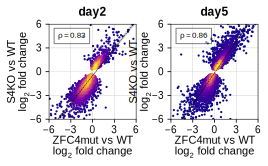

In [5]:
scatter_fig7_df = pd.read_csv("data/Fig7/fc_df.tsv", sep="\t", index_col=0)
fig, axes = plt.subplots(1, 2, figsize=(3.75, 1.75))
for padj, timepoint, aax in zip(["ko_timepoint2.tsv padj", "ko_timepoint5.tsv padj"], [2,5], axes):
    temp = scatter_fig7_df[scatter_fig7_df[padj]<0.05][["zfc4mut_timepoint{}.tsv log2FoldChange".format(timepoint), 
                                                           "ko_timepoint{}.tsv log2FoldChange".format(timepoint)]]
    temp.columns = ["x", "y"]
    xy = np.vstack([temp["x"], temp["y"]])
    z = gaussian_kde(xy)(xy)  
    aax.scatter(temp["x"], temp["y"], c=z, s=5, cmap="plasma", edgecolor="")
    sns.regplot(data=temp, x="x", y="y", scatter=False, color="black", 
                line_kws={'linewidth': 0.5, 'linestyle': 'dashed'}, ax=aax)
    aax.set_xlim(-6, 6)
    aax.set_ylim(-6, 6)
    aax.set_xticks([-6, -3, 0, 3, 6])
    aax.set_yticks([-6, -3, 0, 3, 6])
    aax.set_title("day{}".format(timepoint), y=1.025)
    aax.set_xlabel("")
    aax.set_ylabel("")
    aax.set_xlabel("ZFC4mut vs WT\n" r"$\mathregular{log_2}$ fold change")
    aax.set_ylabel("S4KO vs WT\n" r"$\mathregular{log_2}$ fold change")
    corr_value = temp.corr().values[0][-1]
    aax.text(-4.75, 4.25, r"$\mathregular{\rho=" +"{:.2f}".format(corr_value) + "}$", fontsize="8", bbox=dict(facecolor='white', edgecolor='black', alpha=0.5))

# Figure S7D

<ipython-input-6-4f30cff46ed1>:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  aax.scatter(temp["x"], temp["y"], c=z, s=5, cmap="plasma", edgecolor="")
<ipython-input-6-4f30cff46ed1>:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  aax.scatter(temp["x"], temp["y"], c=z, s=5, cmap="plasma", edgecolor="")


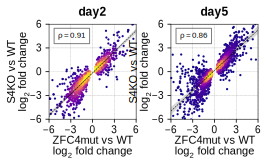

In [6]:
scatter_fig7_df = pd.read_csv("data/Fig7/fc_df.tsv", sep="\t", index_col=0)
fig, axes = plt.subplots(1, 2, figsize=(3.75, 1.75))
for padj, timepoint, aax in zip(["zfc4mut_timepoint2.tsv padj", "zfc4mut_timepoint5.tsv padj"], [2,5], axes):
    temp = scatter_fig7_df[scatter_fig7_df[padj]<0.05][["zfc4mut_timepoint{}.tsv log2FoldChange".format(timepoint), 
                                                           "ko_timepoint{}.tsv log2FoldChange".format(timepoint)]]
    temp.columns = ["x", "y"]
    xy = np.vstack([temp["x"], temp["y"]])
    z = gaussian_kde(xy)(xy)  
    aax.scatter(temp["x"], temp["y"], c=z, s=5, cmap="plasma", edgecolor="")
    sns.regplot(data=temp, x="x", y="y", scatter=False, color="black", 
                line_kws={'linewidth': 0.5, 'linestyle': 'dashed'}, ax=aax)
    aax.set_xlim(-6, 6)
    aax.set_ylim(-6, 6)
#     aax.text(-8, 8, r"$r={:.2f}$".format(corr))
    aax.set_xticks([-6, -3, 0, 3, 6])
    aax.set_yticks([-6, -3, 0, 3, 6])
    aax.set_title("day{}".format(timepoint), y=1.025)
    aax.set_xlabel("")
    aax.set_ylabel("")
    aax.set_xlabel("ZFC4mut vs WT\n" r"$\mathregular{log_2}$ fold change")
    aax.set_ylabel("S4KO vs WT\n" r"$\mathregular{log_2}$ fold change")
    corr_value = temp.corr().values[0][-1]
    aax.text(-4.75, 4.25, r"$\mathregular{\rho=" +"{:.2f}".format(corr_value) + "}$", fontsize="8", bbox=dict(facecolor='white', edgecolor='black', alpha=0.5))

In [7]:
rnaseq = pd.read_csv("data/Fig3/both_rnaseq_2020_05.tsv", sep="\t")
diff_rnaseq = pd.read_csv("data/Fig3/differentiation_rnaseq.tsv", sep="\t")
at_mean = rnaseq[rnaseq["comparison_person"]=="ZFC4mut vs WT RP"][["gene_id","AT mean"]].set_index("gene_id")["AT mean"].to_dict()
diff_rnaseq.loc[diff_rnaseq.index, "AT mean"] = diff_rnaseq.copy()["gene_id"].apply(lambda x: at_mean.get(x, np.nan))
gene_name_to_ensembl={}
for i, j in zip(diff_rnaseq["gene"].values, diff_rnaseq["gene_id"].values):
    gene_name_to_ensembl[i] = j

In [8]:
go_term_genes_3 = list(pd.read_csv("data/Fig7/GO_0045666_all_genes.tsv", sep="\t", header=None)[2].values)
box_dfs_2 = []
box_dfs_5 = []
for timepoint, bdf in zip([2, 5], [box_dfs_2, box_dfs_5]):
    for comparison, fname  in zip(["wt", "zfc12d", "zfc4mut", "ko"], ["WT vs WT", "ZFC1-2Δ vs WT", "ZFC4mut vs WT", "KO vs WT"]):
        df = pd.read_csv("data/Fig7/{}_timepoint{}.tsv".format(comparison, timepoint), sep="\t", index_col=0)        
        valid_genes = []
        for i in go_term_genes_3:
            if gene_name_to_ensembl.get(i, False):
                valid_genes.append(gene_name_to_ensembl[i])
        df = df.loc[valid_genes][["log2FoldChange"]]
        df.columns = [fname]
        bdf.append(df)
box_df_2 = pd.melt(pd.concat(box_dfs_2, axis=1).reset_index(), id_vars="index")
box_df_5 = pd.melt(pd.concat(box_dfs_5, axis=1).reset_index(), id_vars="index")

# Figure 7D (day2)

/usr/lib/python3.8/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_boxplot : Removed 278 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/usr/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):
/usr/lib/python3.8/site-packages/plotnine/themes/theme.py:250: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  rcParams[key] = val
/usr/lib/python3.8/site-packages/plotnine/themes/theme.py:250: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  rcParams[key] = val
/usr/lib/python3.8/site-packages/plotnine/themes/theme.py:250: MatplotlibDeprecationWarning: 
The animation.html_args rcparam

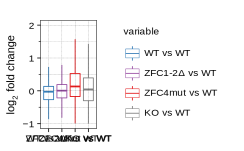

<ggplot: (8785076840301)>

In [9]:
from plotnine import ggsave, scale_color_manual, xlab, ylab, scale_x_discrete, theme
p = (ggplot(box_df_2, aes('variable', 'value', color='variable'))
 + geom_boxplot(outlier_shape='') 
 + scale_color_manual(values=["#377eb8", "#984ea3", "#e41a1c", "grey"],
                      limits=["WT vs WT", "ZFC1-2Δ vs WT", "ZFC4mut vs WT", "KO vs WT"])
 + ylim(-1, 2) + xlab("") + ylab(r"$\mathregular{log_2}$ fold change")
 + scale_x_discrete(limits=["WT vs WT", "ZFC1-2Δ vs WT", "ZFC4mut vs WT", "KO vs WT"]) 
 + theme_matplotlib() + theme(figure_size=(1,2)))
p

# Figure 7D (day 5)

/usr/lib/python3.8/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_boxplot : Removed 308 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/usr/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):
/usr/lib/python3.8/site-packages/plotnine/themes/theme.py:250: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  rcParams[key] = val
/usr/lib/python3.8/site-packages/plotnine/themes/theme.py:250: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  rcParams[key] = val
/usr/lib/python3.8/site-packages/plotnine/themes/theme.py:250: MatplotlibDeprecationWarning: 
The animation.html_args rcparam

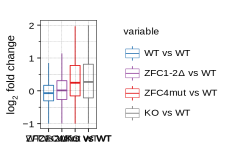

<ggplot: (8785067534135)>

In [10]:
p = (ggplot(box_df_5, aes('variable', 'value', color='variable'))
 + geom_boxplot(outlier_shape='') 
 + scale_color_manual(values=["#377eb8", "#984ea3", "#e41a1c", "grey"],
                      limits=["WT vs WT", "ZFC1-2Δ vs WT", "ZFC4mut vs WT", "KO vs WT"])
 + ylim(-1, 2) + xlab("") + ylab(r"$\mathregular{log_2}$ fold change")
 + scale_x_discrete(limits=["WT vs WT", "ZFC1-2Δ vs WT", "ZFC4mut vs WT", "KO vs WT"])
 + theme_matplotlib() + theme(figure_size=(1,2)))
p

In [11]:
def gene_body_plot(matrix_file, ax, groups=5, cmap="Reds"):
    
    palette = sns.color_palette(cmap, groups+2).as_hex()[2:]
    
    matrix_df = pd.read_csv(matrix_file, sep="\t", comment="@", header=None)
    matrix_df.loc[list(matrix_df.index), "AT mean"] = list(matrix_df[matrix_df.columns[5:]].mean(axis=1).values)
    matrix_df.loc[list(matrix_df.index), "group"] = list(pd.qcut(matrix_df["AT mean"], groups, labels=list(range(1, groups+1))).values)
    matrix_df = matrix_df.drop("AT mean", axis=1)
    
    for (i, j), c in zip(matrix_df.groupby("group"), palette):
        jj = j[list(range(6,1706))]
        jmean = jj.mean().values
        ax.plot(range(len(jj.columns)), jmean, linewidth=0.5, color=c)    
        down, up = sms.DescrStatsW(jj).tconfint_mean(alpha=0.001, alternative="two-sided")    
        ax.fill_between(list(range(len(jj.columns))), up, down, color=c, linewidth=0, alpha=0.25)
    
    ax.set_ylim(0.35, 0.65)
    ax.set_yticks([0.4, 0.5, 0.6])
    ax.set_xlim(0,1700)
    ax.set_xticks([0, 500, 1500, 1700])
    ax.set_xticklabels(["-5k", "TSS", "TES", "+2k"], rotation=90)        
    ax.set_ylabel("AT")

def fold_change_plot(rnaseq_df, genes, ax, comparisons=["KO vs WT TQ", "ZFC4mut vs WT TQ", "ZFC4D vs WT TQ"], 
                     labels=["KO vs WT", "ZFC4mut\nvs WT", "ZFC4Δ\nvs WT"], groups=5, cmap="Reds", ymin=-2.5, ymax=2.5, yticks=[-2, 0, 2]):
    
    palette = sns.color_palette(cmap, groups+2).as_hex()[2:]
    temp = rnaseq_df[(rnaseq_df["gene_id"].isin(genes)) & (rnaseq_df["comparison_person"].isin(comparisons))].copy()
    temp.loc[list(temp.index), "group"] = list(pd.qcut(temp["AT mean"], groups, labels=list(range(1, groups+1))).values)
    sns.pointplot(data=temp, x="comparison_person", y="log2FoldChange", hue="group", join=False, dodge=0.475, 
                  hue_order=[1,2,3,4,5], legend=False, ax=ax, ci="sd", scale=0.7, errwidth=0.5, capsize=0.05, 
                  palette=palette, order=comparisons)
    ax.set_xticklabels(labels, rotation=90)
    ax.legend().set_visible(False)
    ax.set_xlabel("")    
    ax.set_ylabel(r"$\mathregular{log_2}$ fold change")    
    ax.set_ylim(ymin, ymax)
    ax.set_yticks(yticks)
    ax.yaxis.set_minor_locator(MultipleLocator(1))
    ax.axhline(y=0, linestyle="solid", color="black", linewidth=0.5, zorder=-2)
    
def diff_fold_change_plot(rnaseq_df, genes, ax, comparisons=["KO vs WT TQ", "ZFC4mut vs WT TQ", "ZFC4D vs WT TQ"], 
                     labels=["KO vs WT", "ZFC4mut\nvs WT", "ZFC4Δ\nvs WT"], groups=5, cmap="Reds", ymin=-2.5, ymax=2.5, yticks=[-2, 0, 2]):
    
    palette = sns.color_palette(cmap, groups+2).as_hex()[2:]
    temp = rnaseq_df[(rnaseq_df["gene_id"].isin(genes)) & (rnaseq_df["cell_line"].isin(comparisons))].copy()
    temp.loc[list(temp.index), "group"] = list(pd.qcut(temp["AT mean"], groups, labels=list(range(1, groups+1))).values)
    sns.pointplot(data=temp, x="cell_line", y="log2FoldChange vs 0", hue="group", join=False, dodge=0.475, 
                  hue_order=[1,2,3,4,5], legend=False, ax=ax, ci="sd", scale=0.7, errwidth=0.5, capsize=0.05, 
                  palette=palette, order=comparisons)
    ax.set_xticklabels(labels, rotation=90)
    ax.legend().set_visible(False)
    ax.set_xlabel("")    
    ax.set_ylabel(r"$\mathregular{log_2}$ fold change")    
    ax.set_ylim(ymin, ymax)
    ax.set_yticks(yticks)
    ax.yaxis.set_minor_locator(MultipleLocator(1))
    ax.axhline(y=0, linestyle="solid", color="black", linewidth=0.5, zorder=-2)

def stats_plot(stats_file, ax, genes="TQ ZFC4", comparisons=["KO vs WT TQ", "ZFC4mut vs WT TQ", "ZFC4D vs WT TQ"], 
               labels=["KO vs WT", "ZFC4mut\nvs WT", "ZFC4Δ\nvs WT"], color="#e41a1c"):
    stats_df = pd.read_csv(stats_file, sep="\t")
    stats_df["min_error"] = stats_df["mean_effect"] - stats_df["min_effect"]
    stats_df["max_error"] = stats_df["max_effect"] - stats_df["mean_effect"]
    stats_df = stats_df[(stats_df["genes"]==genes) & (stats_df["sample"].isin(comparisons))].copy()
    stats_df.index = stats_df["sample"]
    stats_df = stats_df.reindex(comparisons).copy()
    for ii, jj, kk, ll, mm in zip(stats_df["mean_effect"].values, range(0, len(comparisons)), 
                                  stats_df[["min_error","max_error"]].values, 
                                  2.5*stats_df["pointsize"].values, stats_df["minus_log10_padjust_fvalue"].values):        
        if mm < 2:
            ax.errorbar(jj, ii, yerr=np.array([kk]).T, markersize=5, markeredgecolor=color, color="white", fmt="o", linewidth=0.5,
                   elinewidth=1, ecolor=color, capsize=0.1)
        else:
            ax.errorbar(jj, ii, yerr=np.array([kk]).T, markersize=5, markeredgecolor="black", color=color, fmt="o", linewidth=0.5,
                   elinewidth=1, capsize=0.1)
    ax.set_xlim(-0.5, len(comparisons)-0.5)
    ax.set_xticks(range(len(comparisons)))
    ax.set_xticklabels(labels, rotation=90)    
    ax.set_ylim(-2, 12)
    ax.set_yticks([0, 5, 10])
    ax.axhline(y=0, linestyle="solid", color="black", linewidth=0.5, zorder=-2)
    ax.set_ylabel("AT effect size")

# Figure S7A

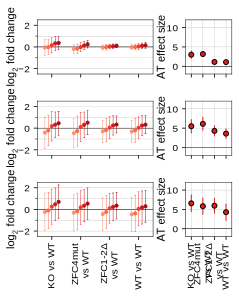

In [12]:
fig, ((ax, bx), (cx, dx), (ex, fx)) = plt.subplots(3, 2, figsize=(3.5,4), gridspec_kw={'width_ratios': (2.5,1)}, sharex=True)
rp_zfc4_genes = list(pd.read_csv("data/Fig6/rp_zfc4_exclusive_regulated_genes.bed", sep="\t", header=None)[3].values)
diff_fold_change_plot(diff_rnaseq, rp_zfc4_genes, ax, cmap="Reds", 
    comparisons=["KO.vs.WT\n0.vs.0", "ZFC4mut.vs.WT\n0.vs.0", "S4B.vs.WT\n0.vs.0", "WT2.vs.WT\n0.vs.0"],
              labels=["KO vs WT", "ZFC4mut\nvs WT", "ZFC1-2Δ\n vs WT", "WT vs WT"])
stats_plot("data/Fig3/combined_stats.tsv", bx, genes="RP D20 ZFC4", color="#e41a1c",
           comparisons=["KO vs WT 0.vs.0", "ZFC4mut vs WT 0.vs.0", "S4B vs WT 0.vs.0", "WT2 vs WT 0.vs.0"],
              labels=["KO vs WT", "ZFC4mut\nvs WT", "ZFC1-2Δ\n vs WT", "WT vs WT"])

diff_fold_change_plot(diff_rnaseq, rp_zfc4_genes, cx, cmap="Reds", 
    comparisons=["KO.vs.WT\n2.vs.0", "ZFC4mut.vs.WT\n2.vs.0", "S4B.vs.WT\n2.vs.0", "WT2.vs.WT\n2.vs.0"],
              labels=["KO vs WT", "ZFC4mut\nvs WT", "ZFC1-2Δ\n vs WT", "WT vs WT"])
stats_plot("data/Fig3/combined_stats.tsv", dx, genes="RP D20 ZFC4", color="#e41a1c",
           comparisons=["KO vs WT 2.vs.0", "ZFC4mut vs WT 2.vs.0", "S4B vs WT 2.vs.0", "WT2 vs WT 2.vs.0"],
              labels=["KO vs WT", "ZFC4mut\nvs WT", "ZFC1-2Δ\n vs WT", "WT vs WT"])

diff_fold_change_plot(diff_rnaseq, rp_zfc4_genes, ex, cmap="Reds", 
    comparisons=["KO.vs.WT\n5.vs.0", "ZFC4mut.vs.WT\n5.vs.0", "S4B.vs.WT\n5.vs.0", "WT2.vs.WT\n5.vs.0"],
              labels=["KO vs WT", "ZFC4mut\nvs WT", "ZFC1-2Δ\n vs WT", "WT vs WT"])
stats_plot("data/Fig3/combined_stats.tsv", fx, genes="RP D20 ZFC4", color="#e41a1c",
           comparisons=["KO vs WT 5.vs.0", "ZFC4mut vs WT 5.vs.0", "S4B vs WT 5.vs.0", "WT2 vs WT 5.vs.0"],
              labels=["KO vs WT", "ZFC4mut\nvs WT", "ZFC1-2Δ\n vs WT", "WT vs WT"])


# Figure S7B

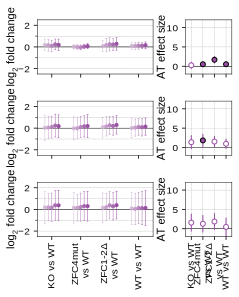

In [13]:
fig, ((ax, bx), (cx, dx), (ex, fx)) = plt.subplots(3, 2, figsize=(3.5,4), gridspec_kw={'width_ratios': (2.5,1)}, sharex=True)
rp_zfc4_genes = list(pd.read_csv("data/Fig6/rp_zfc12d_exclusive_regulated_genes.bed", sep="\t", header=None)[3].values)
diff_fold_change_plot(diff_rnaseq, rp_zfc4_genes, ax, cmap=sns.light_palette("#984ea3", 7), 
    comparisons=["KO.vs.WT\n0.vs.0", "ZFC4mut.vs.WT\n0.vs.0", "S4B.vs.WT\n0.vs.0", "WT2.vs.WT\n0.vs.0"],
              labels=["KO vs WT", "ZFC4mut\nvs WT", "ZFC1-2Δ\n vs WT", "WT vs WT"])
stats_plot("data/Fig3/combined_stats.tsv", bx, genes="RP ZFC12D DIFF", color="#984ea3",
           comparisons=["KO vs WT 0.vs.0", "ZFC4mut vs WT 0.vs.0", "S4B vs WT 0.vs.0", "WT2 vs WT 0.vs.0"],
              labels=["KO vs WT", "ZFC4mut\nvs WT", "ZFC1-2Δ\n vs WT", "WT vs WT"])

diff_fold_change_plot(diff_rnaseq, rp_zfc4_genes, cx, cmap=sns.light_palette("#984ea3", 7), 
    comparisons=["KO.vs.WT\n2.vs.0", "ZFC4mut.vs.WT\n2.vs.0", "S4B.vs.WT\n2.vs.0", "WT2.vs.WT\n2.vs.0"],
              labels=["KO vs WT", "ZFC4mut\nvs WT", "ZFC1-2Δ\n vs WT", "WT vs WT"])
stats_plot("data/Fig3/combined_stats.tsv", dx, genes="RP ZFC12D DIFF", color="#984ea3",
           comparisons=["KO vs WT 2.vs.0", "ZFC4mut vs WT 2.vs.0", "S4B vs WT 2.vs.0", "WT2 vs WT 2.vs.0"],
              labels=["KO vs WT", "ZFC4mut\nvs WT", "ZFC1-2Δ\n vs WT", "WT vs WT"])

diff_fold_change_plot(diff_rnaseq, rp_zfc4_genes, ex, cmap=sns.light_palette("#984ea3", 7), 
    comparisons=["KO.vs.WT\n5.vs.0", "ZFC4mut.vs.WT\n5.vs.0", "S4B.vs.WT\n5.vs.0", "WT2.vs.WT\n5.vs.0"],
              labels=["KO vs WT", "ZFC4mut\nvs WT", "ZFC1-2Δ\n vs WT", "WT vs WT"])
stats_plot("data/Fig3/combined_stats.tsv", fx, genes="RP ZFC12D DIFF", color="#984ea3",
           comparisons=["KO vs WT 5.vs.0", "ZFC4mut vs WT 5.vs.0", "S4B vs WT 5.vs.0", "WT2 vs WT 5.vs.0"],
              labels=["KO vs WT", "ZFC4mut\nvs WT", "ZFC1-2Δ\n vs WT", "WT vs WT"])

# Figure S7C

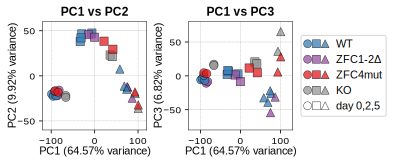

In [14]:
tpm = pd.read_csv("data/Fig7/rld.tsv", sep="\t", index_col=0)
rld = tpm.T
design = pd.read_csv("data/Fig7/design.tsv", sep=",")
design = design.reset_index(drop=True)
rld = rld.loc[design["sample"].values]

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(rld)
principalDf = pd.DataFrame(data = principalComponents, columns=["PC1", "PC2", "PC3"])
principalDf["gene_expressed"] = design["genotype"]
principalDf["age"] = design["timepoint"]
principalComponentsVariance = {}
for i, j in zip(["PC1", "PC2", "PC3"], pca.explained_variance_ratio_):
    principalComponentsVariance[i] = "{} ({:.2%} variance)".format(i, j)

colors = sns.color_palette().as_hex()
wt = Line2D([0], [0], color='white', label='WT', marker='o', markerfacecolor="#377eb8", markeredgewidth=0.5,
            markeredgecolor='black', alpha=0.75, markersize=8)
wt2 = Line2D([0], [0], color='white', label='WT', marker='s', markerfacecolor="#377eb8", markeredgewidth=0.5, 
             markeredgecolor='black', alpha=0.75, markersize=8)
wt5 = Line2D([0], [0], color='white', label='WT', marker='^', markerfacecolor="#377eb8", markeredgewidth=0.5,
             markeredgecolor='black', alpha=0.75, markersize=8)

zfc12d = Line2D([0], [0], marker='o', color='white', label='ZFC1-2Δ', markerfacecolor="#984ea3", markeredgecolor='black', markersize=8, alpha=0.75, markeredgewidth=0.5)
zfc12d2 = Line2D([0], [0], marker='s', color='white', label='ZFC1-2Δ', markerfacecolor="#984ea3", markeredgecolor='black', markersize=8, alpha=0.75, markeredgewidth=0.5)
zfc12d5 = Line2D([0], [0], marker='^', color='white', label='ZFC1-2Δ', markerfacecolor="#984ea3", markeredgecolor='black', markersize=8, alpha=0.75, markeredgewidth=0.5)

zfc4mut = Line2D([0], [0], color='white', label='ZFC4mut', marker='o', markerfacecolor="#e41a1c", markeredgecolor='black', alpha=0.75, markersize=8, markeredgewidth=0.5)
zfc4mut2 = Line2D([0], [0], color='white', label='ZFC4mut', marker='s', markerfacecolor="#e41a1c", markeredgecolor='black', alpha=0.75, markersize=8, markeredgewidth=0.5)
zfc4mut5 = Line2D([0], [0], color='white', label='ZFC4mut', marker='^', markerfacecolor="#e41a1c", markeredgecolor='black', alpha=0.75, markersize=8, markeredgewidth=0.5)

ko = Line2D([0], [0], marker='o', color='white', label='KO', markerfacecolor="#969696", markeredgecolor='black', markersize=8, alpha=0.75, markeredgewidth=0.5)
ko2 = Line2D([0], [0], marker='s', color='white', label='KO', markerfacecolor="#969696", markeredgecolor='black', markersize=8, alpha=0.75, markeredgewidth=0.5)
ko5 = Line2D([0], [0], marker='^', color='white', label='KO', markerfacecolor="#969696", markeredgecolor='black', markersize=8, alpha=0.75, markeredgewidth=0.5)

ntmut = Line2D([0], [0], marker='o', color='white', label='NTmut', markerfacecolor="#33a02c", markeredgecolor='black', markersize=14, alpha=0.75)
sid_c17 = Line2D([0], [0], color='white', label='SID C17', marker='o', markerfacecolor="#ff7f00", markeredgecolor='black', alpha=0.75, markersize=14),
sid_c7 = Line2D([0], [0], marker='o', color='white', label='SID C7', markerfacecolor="#fdbf6f", markeredgecolor='black', markersize=14, alpha=0.75)
rep1 = Line2D([0], [0], marker='o', color='white', label='Rep1', markerfacecolor='black', markeredgecolor='black', markersize=14)
rep2 = Line2D([0], [0], marker='v', color='white', label='Rep2', markerfacecolor='black', markeredgecolor='black', markersize=14)
rep3 = Line2D([0], [0], marker='P', color='white', label='Rep3', markerfacecolor='black', markeredgecolor='black', markersize=14)
rep4 = Line2D([0], [0], marker='*', color='white', label='Rep4', markerfacecolor='black', markeredgecolor='black', markersize=14)
day0 = Line2D([0], [0], marker='o', color='white', label='day 0', markerfacecolor='white', markeredgecolor='black', alpha=0.75, markersize=8, markeredgewidth=0.5)
day2 = Line2D([0], [0], marker='s', color='white', label='day 2', markerfacecolor='white', markeredgecolor='black', alpha=0.75, markersize=8, markeredgewidth=0.5)
day5 = Line2D([0], [0], marker='^', color='white', label='day 5', markerfacecolor='white', markeredgecolor='black', alpha=0.75, markersize=8, markeredgewidth=0.5)

shape = {"0d": "o", "2d": "s", "5d": "^", 0: "o", 2: "s", 5: "^"}
gene_expressed_colors = {"KO1":"#969696", "S4B1":"#984ea3", "WT1":"#377eb8", "WT2":"#377eb8", "ZFC4mut1":"#e41a1c", 
                         "NTmut":"#33a02c", "SID_C17":"#ff7f00", "SID_C7":"#fdbf6f"}
age_size = {"0d": 200, "2d": 300, "5d":500, "7d": 600, 0: 80, 2: 80, 5:120, 7: 600}
fig, ax = plt.subplots(1, 2, figsize=(4.5,2))

day_elements = [(day0), (day2), (day5)]
legend_elements = [(wt, wt2, wt5), (zfc12d, zfc12d2, zfc12d5), (zfc4mut, zfc4mut2, zfc4mut5), (ko,ko2, ko5), (day0,day2,day5)]

principalDf["gene_expressed_colors"] = principalDf["gene_expressed"].apply(lambda x: gene_expressed_colors[x])
principalDf["age_size"] = principalDf["age"].apply(lambda x: age_size[x])
for nn, (c1, c2) in enumerate([("PC1", "PC2"), ("PC1", "PC3")]):
    for ii, (i, j) in enumerate(principalDf.groupby("age")):        
        ax[nn].scatter(j[c1].values, j[c2].values,
                       c=j["gene_expressed_colors"].values,
                       s=70, 
                       marker=shape[i], edgecolor="black", linewidth=0.5, alpha=0.75)
    ax[nn].set_xlabel(principalComponentsVariance[c1])
    ax[nn].set_ylabel(principalComponentsVariance[c2])
    ax[nn].set_title("{} vs {}".format(c1, c2))
#     ax[nn].set_xticklabels([])
#     ax[nn].set_yticklabels([])
    if nn==1:
        ax[nn].legend(handles=legend_elements, labels=["WT", "ZFC1-2Δ", "ZFC4mut", "KO", "day 0,2,5"], loc="center right", 
                            ncol=1, handler_map = {tuple: matplotlib.legend_handler.HandlerTuple(None)},
                           bbox_to_anchor=(1.95, 0.5))
        ax[nn].set_xlim(-130, 130)
        ax[nn].set_ylim(-80, 80)
    else:
        ax[nn].set_ylim(-60, 60)
        ax[nn].set_xlim(-120, 120)
        ax[nn].set_yticks([-50, 0, 50])

In [15]:
from sinfo import sinfo
sinfo()

-----
matplotlib  3.3.2
numpy       1.19.2
pandas      1.1.3
plotnine    0.6.0
scipy       1.5.2
seaborn     0.11.0
sinfo       0.3.1
sklearn     0.23.2
statsmodels 0.12.0
-----
IPython             7.18.1
jupyter_client      6.1.7
jupyter_core        4.6.3
jupyterlab          2.2.8
notebook            6.1.4
-----
Python 3.8.6 (default, Sep 30 2020, 04:00:38) [GCC 10.2.0]
Linux-5.4.71-1-lts-x86_64-with-glibc2.2.5
4 logical CPU cores
-----
Session information updated at 2020-10-18 21:48
